In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset from CSV
CSV_PATH = 'keypoint_asl.csv'
data = pd.read_csv(CSV_PATH, header=None)

In [3]:
data[0] = data[0].astype(str)

In [4]:
# Split features (X) and labels (y)
X = data.iloc[:, 1:].values  # Extracting landmark points
y = data.iloc[:, 0].values   # Extracting corresponding labels (letters and digits)

In [5]:
data[0].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [6]:
# Encode labels to numeric values (A-Z, 1-9 mapped to 0-34)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Reshape input data for Dense layers
X_train = X_train.reshape(-1, 42)  # Flatten to (21*2 = 42) features per sample
X_test = X_test.reshape(-1, 42)

In [14]:
# Build a Fully Connected Neural Network (instead of CNN)
model = keras.Sequential([
    layers.Input(shape=(42,)),  # 21 landmarks × 2 coordinates
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(36, activation='softmax')  # 36 output classes (A-Z and 0-9)
])

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 36)                  │           2,340 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,100 (62.89 KB)

 Trainable params: 16,100 (62.89 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3707 - loss: 2.1902 - val_accuracy: 0.8967 - val_loss: 0.4485
Epoch 2/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8178 - loss: 0.5930 - val_accuracy: 0.9281 - val_loss: 0.2654
Epoch 3/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8785 - loss: 0.3987 - val_accuracy: 0.9492 - val_loss: 0.1792
Epoch 4/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9125 - loss: 0.3019 - val_accuracy: 0.9586 - val_loss: 0.1376
Epoch 5/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9307 - loss: 0.2371 - val_accuracy: 0.9722 - val_loss: 0.1042
Epoch 6/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9450 - loss: 0.1923 - val_accuracy: 0.9820 - val_loss: 0.0795
Epoch 7/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9521 - loss: 0.1728 - val_accuracy: 0.9805 - val_loss: 0.0737
Epoch 8/20
680/680 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9633 - loss: 0.1435 - val_accuracy: 0.

In [18]:
# Save the trained model
model.save('model_asl_new.h5')

print("Model training complete and saved as 'model_isl.h5'")

Model training complete and saved as 'model_isl.h5'


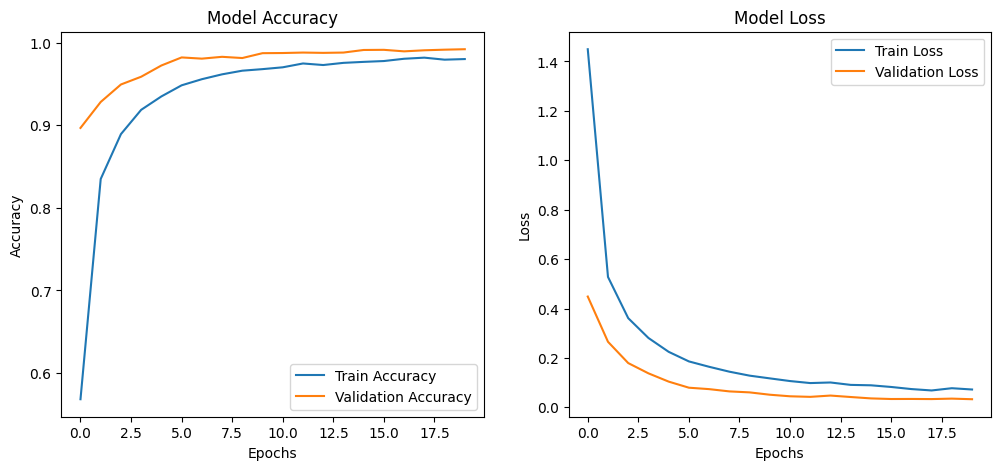

In [19]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9905 - loss: 0.0368
Test Accuracy: 0.9919
Test Loss: 0.0329


In [ ]:
# Reshape input data for CNN
# Each sample has 21 landmarks, each with 2 coordinates, reshaped for CNN input
# X_train = X_train.reshape(-1, 21, 2, 1)
# X_test = X_test.reshape(-1, 21, 2, 1)

# Build CNN model
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(21, 2, 1)),  # First convolutional layer
#     layers.MaxPooling2D((2, 2)),  # Pooling to reduce dimensions
#     layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
#     layers.MaxPooling2D((2, 2)),  # Pooling layer
#     layers.Flatten(),  # Flatten the output for Dense layers
#     layers.Dense(128, activation='relu'),  # Fully connected layer
#     layers.Dense(26, activation='softmax')  # Output layer with 26 classes (A-Z)
# ])